<a href="https://colab.research.google.com/github/Chirag314/Interpretable-AI/blob/main/Explainable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.6 MB/s eta 0:00:00


In [11]:
import shap
import sklearn
import pandas as pd
df=pd.read_csv('/content/energydata_complete.csv')

In [12]:
del df['date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [7]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
y=df.pop('Appliances')
X=df

In [13]:
model=sklearn.linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [14]:
#Print Coefficients
print('Model Coefficients:\n')
for i in range(X.shape[1]):
  print(X.columns[i],"=",model.coef_[i].round(5))

Model Coefficients:

lights = 1.98971
T1 = -0.60374
RH_1 = 15.15362
T2 = -17.70602
RH_2 = -13.48062
T3 = 25.4064
RH_3 = 4.92457
T4 = -3.46525
RH_4 = -0.17891
T5 = -0.02784
RH_5 = 0.14096
T6 = 7.12616
RH_6 = 0.28795
T7 = 1.79463
RH_7 = -1.54968
T8 = 8.14656
RH_8 = -4.66968
T9 = -15.87243
RH_9 = -0.90102
T_out = -10.22819
Press_mm_hg = 0.13986
RH_out = -1.06375
Windspeed = 1.70364
Visibility = 0.15368
Tdewpoint = 5.0488
rv1 = -0.02078
rv2 = -0.02078


In [16]:
#Compute SHAP values for the linear model
explainer=shap.Explainer(model.predict,X)


In [17]:
#SHAP value calculation
shap_values=explainer(X)


PermutationExplainer explainer: 19736it [15:28, 21.11it/s]                           


SHAP values have 3 objests 1. the SHAP value for each feature 2. the base value and 3. the original training data. As there are 27 features , we expect 27 SHAP values.

In [18]:
import numpy as np
pd.DataFrame(np.round(shap_values.values,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,54.916,1.125,111.299,22.239,-60.481,-65.677,26.330,6.334,-1.129,0.066,...,38.380,-3.374,15.269,-2.924,-15.004,4.586,4.023,6.758,0.297,0.297
1,54.916,1.125,97.610,22.239,-59.571,-65.677,26.625,6.334,-1.205,0.066,...,37.851,-3.401,16.462,-2.910,-15.004,4.018,3.433,6.253,0.186,0.186
2,54.916,1.125,91.650,22.239,-58.280,-65.677,27.331,6.588,-1.187,0.066,...,38.909,-3.347,17.656,-2.896,-15.004,3.450,2.844,5.748,-0.022,-0.022


In [19]:
# Average prediction value is called as the base value
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

,0
0,95.815
1,95.815
2,95.815


In [20]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,30.0,19.89,47.597,19.2,44.790,19.79,44.730,19.000,45.567,17.167,...,17.033,45.53,6.600,733.5,92.0,7.000,63.000,5.3,13.275,13.275
1,30.0,19.89,46.693,19.2,44.722,19.79,44.790,19.000,45.992,17.167,...,17.067,45.56,6.483,733.6,92.0,6.667,59.167,5.2,18.606,18.606
2,30.0,19.89,46.300,19.2,44.627,19.79,44.933,18.927,45.890,17.167,...,17.000,45.50,6.367,733.7,92.0,6.333,55.333,5.1,28.643,28.643


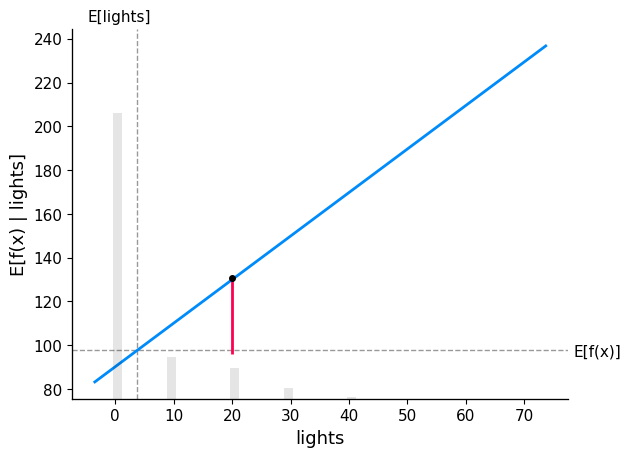

In [21]:
#Partial dependency plot
sample=20
shap.partial_dependence_plot("lights",model.predict,X,model_expected_value=True,feature_expected_value=True,ice=False,shap_values=shap_values[sample:sample+1])

Here 20th sample is selected from train dataset. Figure shows partial dependency superimposed with the 20th record in red.

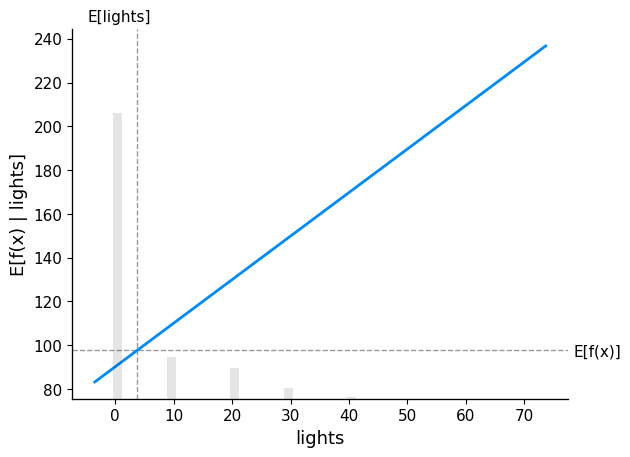

In [22]:
shap.partial_dependence_plot('lights',model.predict,X,ice=False,model_expected_value=True,feature_expected_value=True)

Waterfalls plot shows how we get from shap_values.base_values to model.predict(X)[sample]

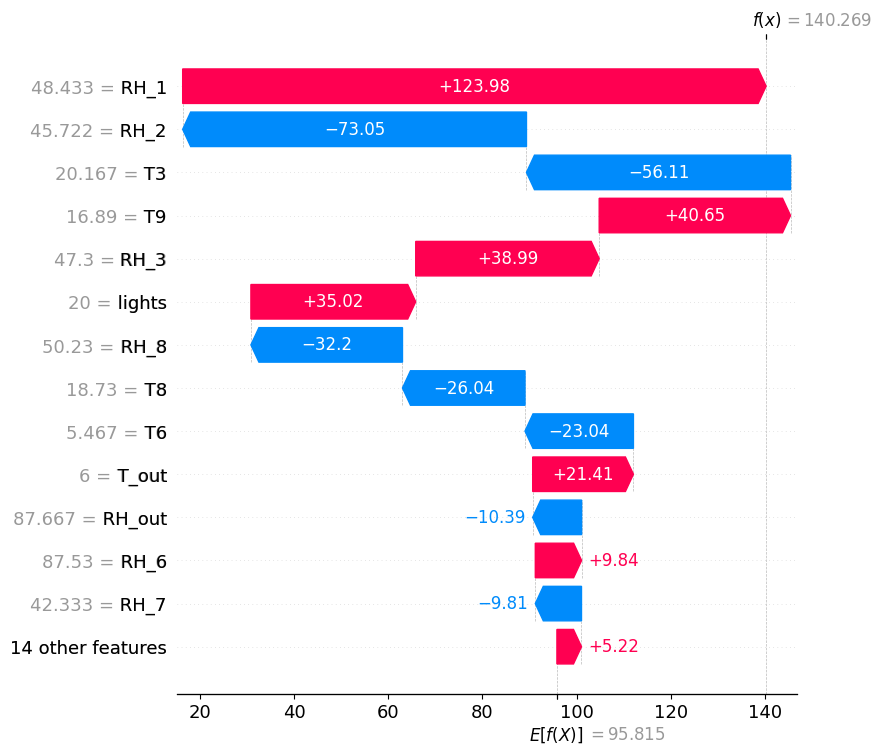

In [23]:
shap.plots.waterfall(shap_values[sample],max_display=14)

The predicted output for the 20th record is 140. The most influential feature impacting the 20th record is RH_1 which is humidity in kitchen area in percentage and RH2 which is humidity in living area. In the bottom part there are 14 other features which are not very important for 20th record prediction.